In [29]:
import os
import sys
src = os.path.abspath(os.path.join('../'))
if src not in sys.path:
    sys.path.append(src)

In [30]:
from data import utils

In [31]:
rootdir = os.path.join('../../')
datadir = os.path.join(rootdir, 'data')
dataraw = os.path.join(datadir, 'raw')
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'
filename = utils.fetch_data(url, dataraw)
if filename is not None:
    utils.extract_tarfile(dataraw, filename)

In [32]:
import numpy as np
import pandas as pd

In [33]:
raw_datafile = os.path.join(dataraw, 'housing.csv')
df = pd.read_csv(raw_datafile)

In [36]:
df['id'] = df['longitude']*1000 + df['latitude']

In [40]:
df.set_index('id')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
id,,,,,,,,,,
-122192.12,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122182.14,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122202.15,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122212.15,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
-121050.52,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
-121170.51,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
-121180.57,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
id                    20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [42]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

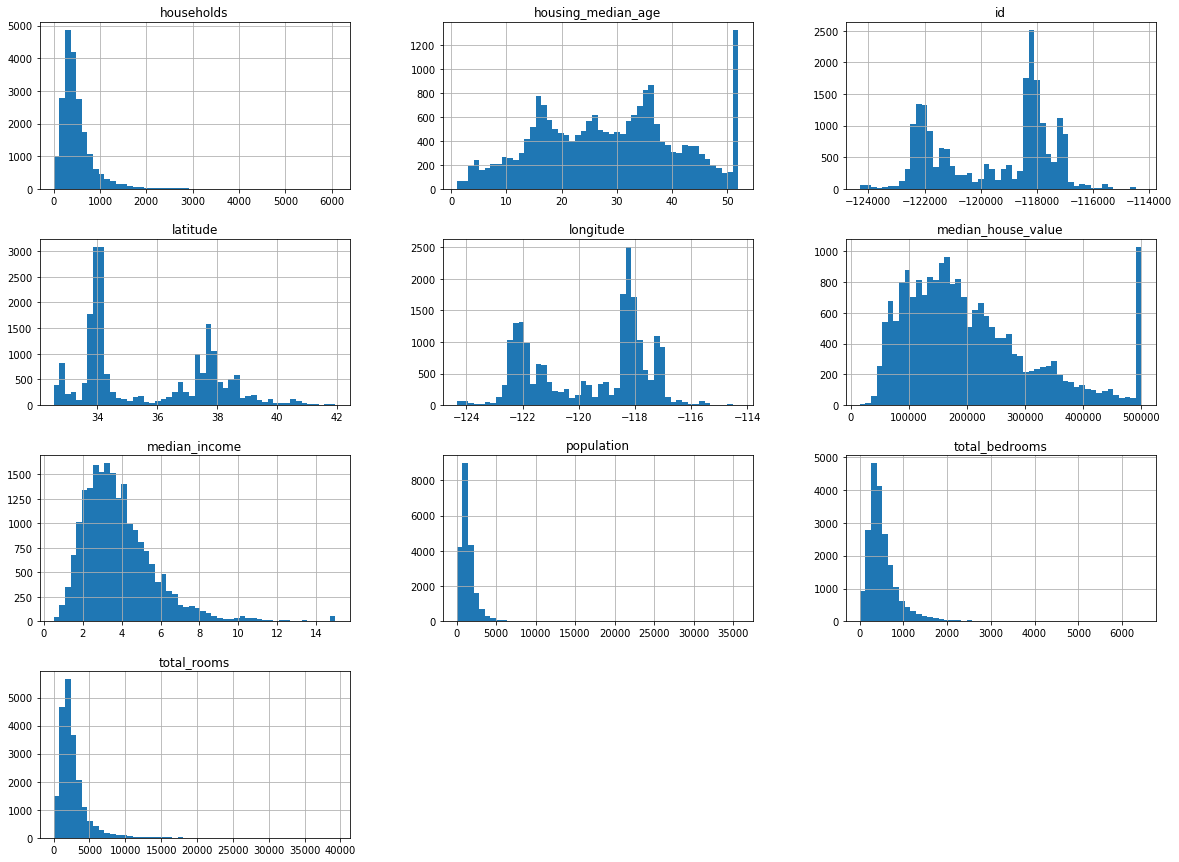

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
(train_df, test_df) = train_test_split(df, test_size=0.2, random_state=66)

In [45]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17008 to 8823
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16353 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
id                    16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 11084 to 9396
Data columns (total 11 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4080 non-null float64
population

In [46]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
17008,-122.29,37.54,41.0,1743.0,349.0,811.0,349.0,4.9464,282400.0,NEAR OCEAN,-122252.46
20111,-120.20,37.80,30.0,1189.0,255.0,446.0,165.0,3.4838,112500.0,INLAND,-120162.20
8199,-118.14,33.79,23.0,2573.0,688.0,1478.0,604.0,3.4833,209400.0,NEAR OCEAN,-118106.21
19553,-121.00,37.62,28.0,1153.0,420.0,1043.0,357.0,1.0801,75000.0,INLAND,-120962.38
8429,-118.36,33.92,46.0,1231.0,231.0,793.0,256.0,4.1023,226800.0,<1H OCEAN,-118326.08
...,...,...,...,...,...,...,...,...,...,...,...
9165,-118.43,34.42,13.0,3600.0,580.0,1799.0,576.0,6.2971,218300.0,<1H OCEAN,-118395.58
5199,-118.28,33.93,21.0,847.0,278.0,1283.0,277.0,1.4329,94100.0,<1H OCEAN,-118246.07
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,412300.0,<1H OCEAN,-121992.67
8243,-118.18,33.78,17.0,1419.0,436.0,1300.0,360.0,2.0769,100000.0,NEAR OCEAN,-118146.22


In [57]:
df['income_category'] = np.ceil(df.median_income/1.5)
df.income_category.where(df.income_category < 5, 5.0, inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_category']):
    print('dupa')
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

dupa


In [60]:
strat_train_set.income_category.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64

In [61]:
strat_test_set.income_category.value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [63]:
df.income_category.value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [65]:
train_df = strat_train_set
test_df = strat_test_set

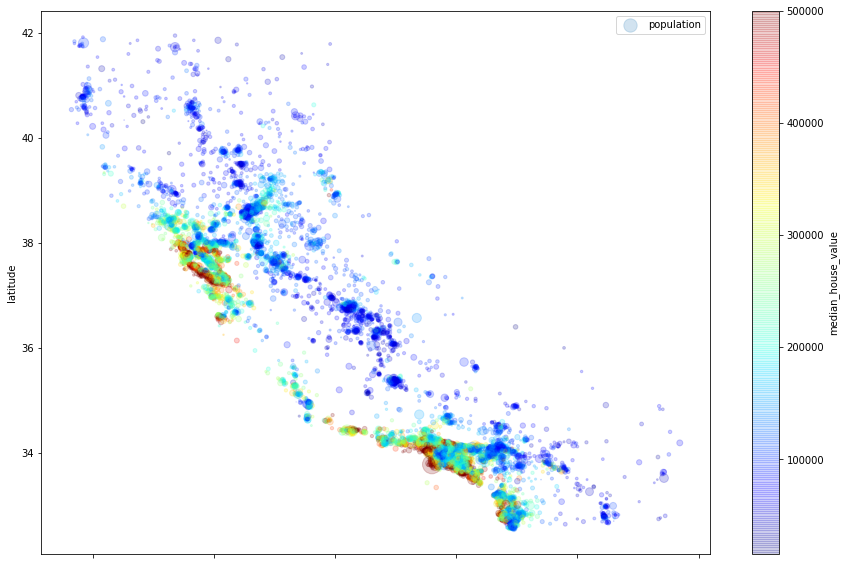

In [78]:
train_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, figsize=(15,10),
             s=df['population']/100, label='population', c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)